In [61]:
import ipywidgets as widgets
from io import BytesIO
import pandas as pd
import docx
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [46]:
file = widgets.FileUpload(
    accept='.docx', # widgets Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

In [43]:
file

FileUpload(value={}, accept='.docx', description='Upload')

In [47]:
paragraphs = docx.Document(BytesIO(file.value['Paar 27_T1_IM_FW.docx']['content'])).paragraphs

KeyError: 'Paar 27_T1_IM_FW.docx'

In [48]:
[paragraph.text for paragraph in paragraphs]

['Paar 27',
 'A: Er',
 'B: Sie',
 'A: Positive Gefühle.',
 'B; Ja, positive Gefühle können bei mir auslösen wenn du mich gut behandelst, fühle ich mich echt toll, wenn du zärtlich mit mir umgehst, zärtlich redest.',
 'A: (A zieht seine Brille auf) Zuwendung, das ist ja, Zuwendung, wir beide, wenn du dich mir zuwendest dann fühle ich mich wohl, das tut mir gut. Verteilung der Haushaltsaufgaben, das machen wir sowieso, ich glaub da brauchen wir, da fühlen wir uns beide wohl, da muss man nichts sagen, dazu. Gleiche Vorstellung bei der Kindererziehung, ich glaub, dass wir da auch nie uns streiten würden, dass wir da sehr ähnliche Auffassungen haben, wie Kinder zu behandeln sind.',
 'B: Wir lieben beide Kinder, [A: Ja] und die lieben uns. Von da ist nichts gemacht. Es ist schön wie du meine Kinder, mein Kinder behandelst, wie deine eigenen, schön.',
 'A: Es tut gut, und mir tut´s auch gut sie zu behandeln (unv. 2 s.).',
 'B: Auch, wie ich dich liebe, dann liebe ich auch deine Verwandtschaft

In [49]:
import spacy

In [50]:
nlp = spacy.load("de_core_news_md")

In [51]:
doc = nlp([paragraph.text for paragraph in paragraphs][14])

In [79]:
from collections import defaultdict
def visualize(doc):
    df = pd.DataFrame()
    pos_counts = defaultdict(int)
    for token in doc:
        if not token.is_punct:
            pos_counts[token.pos_]+=1
    plt.bar(pos_counts.keys(), pos_counts.values())
    return doc

B: Ich hab das auch so schön, ich hab kein Bedürfnis, ich hab keine großen Wünsche, ich möchte nur meine Gesundheit und glücklich mit dir sein. Ich hab eigentlich gar keine großen Wünsche mehr. Ich bin zufrieden mit dem was ich hab.

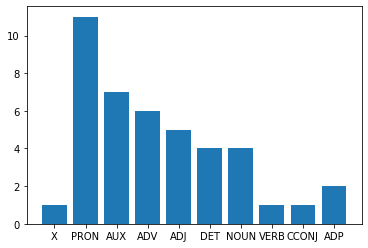

In [80]:
visualize(doc)